<center>
 
# 2) Bike Share Mini Project - Exploratory Data Analysis (EDA)

### by Aditi Gala

<center>
<br>

This notebook is for performing some exploratory data analysis on the bikeshare data to get a better idea of how different features are related to the number of bike rentals. We do a correlation analysis followed by multi-variate regression using the clean data.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
%matplotlib inline

### Daily Data

In [2]:
# Load the clean daily bikeshare data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/daily_clean.csv"
daily = pd.read_csv(file_path)
print("Rows, Columns = ", daily.shape)
daily.head()

Rows, Columns =  (731, 20)


,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month,Day
0,0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5


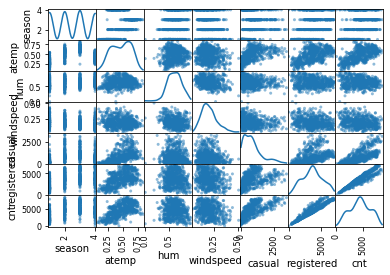

Correlation Coefficient for Count column: 
Unnamed: 0    0.628830
instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Year          0.566710
Month         0.279977
Day          -0.024204
Name: cnt, dtype: float64


In [3]:
# Continuous features
daily_cont = daily[["season", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]

# Scatter plot of continous features
scatter_matrix(daily_cont, diagonal = 'kde')
plt.show()

# Correlation analysis with "count" column
print("Correlation Coefficient for Count column: ")
print(daily.corr(method="pearson")["cnt"])

From the scatter plots and correlation coefficients, we get some idea of which features are related to the total daily count on bike rentals. Other than count of registered users and count of casual users, the three features that seem to have the strongest correlation with daily count is temperature (temp/atemp), year and season.

In [4]:
# Multivariate Regression Analysis with continuous features
lm_daily_full = smf.ols('cnt ~ season + atemp + hum + windspeed + casual + registered', data = daily_cont).fit()
print(lm_daily_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.913e+31
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 18267.
No. Observations:                 731   AIC:                        -3.652e+04
Df Residuals:                     724   BIC:                        -3.649e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.912e-12   8.93e-13      6.620      0.0

The model summary of the full model linear regression fit (where all continuous features were selected), shows us that windspeed may not be a useful varaible (P-value is high)

<br><br>

### Hourly Data

In [5]:
# Load the clean hourly csv data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/hourly_clean.csv"
hourly = pd.read_csv(file_path)
print("Rows, Columns = ", daily.shape)
hourly.head()

Rows, Columns =  (731, 20)


,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month,Day
0,0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5


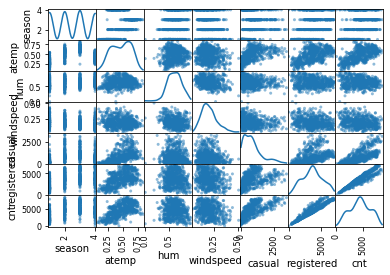

Correlation Coefficient for Count column: 
Unnamed: 0    0.628830
instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Year          0.566710
Month         0.279977
Day          -0.024204
Name: cnt, dtype: float64


In [6]:
# Continuous features
hourly_cont = hourly[["season", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]

# Correlation Analysis on continous features
scatter_matrix(hourly_cont, diagonal = 'kde')
plt.show()

# Correlation analysis with "count" column
print("Correlation Coefficient for Count column: ")
print(hourly.corr(method="pearson")["cnt"])

From the scatter plots and correlation coefficients, we get some idea of which features are related to the total hourly count on bike rentals. Other than count of registered users and count of casual users, the three features that seem to have the strongest correlation with hourly count is temperature (temp/atemp), year and season (just like with daily count previously).

In [7]:
# Multivariate Regression Analysis with continuous features
lm_hourly_full = smf.ols('cnt ~ season + atemp + hum + windspeed + casual + registered', data = hourly_cont).fit()
print(lm_hourly_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.913e+31
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        17:30:15   Log-Likelihood:                 18267.
No. Observations:                 731   AIC:                        -3.652e+04
Df Residuals:                     724   BIC:                        -3.649e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.912e-12   8.93e-13      6.620      0.0

The model summary of the full model linear regression fit (where all continuous features were selected), shows us that windspeed may not be a useful varaible (P-value is high)